# IMDB TOP 250 MOVIES WITH WIKIPEDIA REVISIONS

##  Main objective
* Analyze the correlation between the number of votes and revisions and present your findings

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./files/top250_imdb_movies_with_wikipedia_revisions.csv")

### 1. Imported dataset contains no null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
rank         250 non-null int64
title        250 non-null object
year         250 non-null int64
votes        250 non-null int64
kind         250 non-null object
rating       250 non-null float64
revisions    250 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 13.8+ KB


### 2. Samples of the data set

In [4]:
data.head()

,rank,title,year,votes,kind,rating,revisions
0,1,The Shawshank Redemption,1994,2048162,movie,9.2,6559
1,2,The Godfather,1972,1404779,movie,9.2,9562
2,3,The Godfather: Part II,1974,974002,movie,9.0,3833
3,4,The Dark Knight,2008,2015407,movie,9.0,13984
4,5,12 Angry Men,1957,576977,movie,8.9,307


In [5]:
data.tail()

,rank,title,year,votes,kind,rating,revisions
245,246,Three Colors: Red,1994,77965,movie,8.0,421
246,247,Guardians of the Galaxy,2014,906289,movie,8.0,4781
247,248,Drishyam,2015,52532,movie,8.0,1929
248,249,Pirates of the Caribbean: The Curse of the Bla...,2003,949121,movie,8.0,4012
249,250,Fanny and Alexander,1982,51449,movie,8.0,587


### 3. Scatter Plot Matrix of Each Featured Compared to All Others
##### Initial observations
1. Rating and rank value decrease correspondingly. This is a good way to validate our data makes sense.
2. Revisions and rank does not have a noticeable linear relationship, but the correlation may prove otherwise.
3. Not specifically part of the assignment, but several other relationships have been discovered: revisions - votes, and votes - rating.

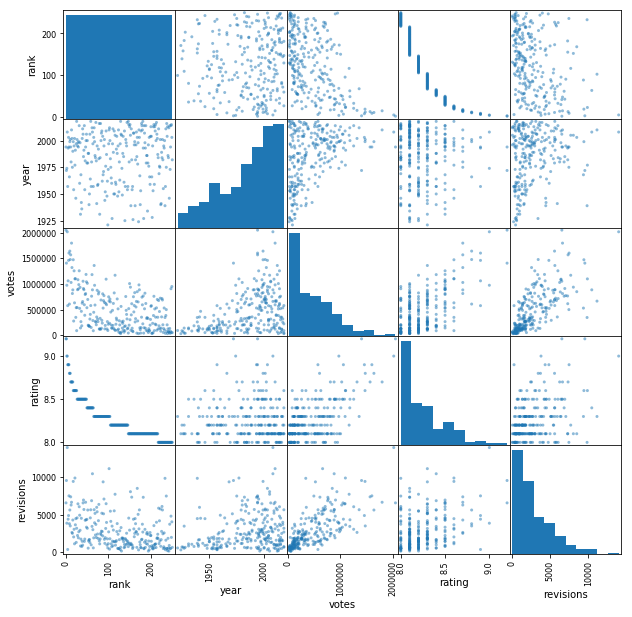

In [6]:
_ = pd.plotting.scatter_matrix(data, figsize=(10, 10))

### 4. Calculate the 3 Main Ways of Correlation: Pearson, Spearman, and Kendall
#### Observations
1. Revisions and rank: weak negative correlation with all three calculations. Spearman rank and Kendall are used for rank correlations which is the test we are observing. Both are similar, although the Kendall correllation is lower. This is generally the case when comparing Spearman vs. Kendall. However, with a smaller sample size, I would tend to choose the Kendall correlation.
2. Rating and rank: As noted above, a good control to see that our calculations make sense. All three correlations show a strong negative relationship, Spearman being the highest. This relationship shows that your rank lowers as your rating lowers.
3. Ratings and votes: Surprising positive correlation. It could mean that people who really love their movie of choice are more willing to vote.
4. Revisions and votes: Similiar surprising positive correlation. Again it is possible that people who are really involved with the movie are more willing to keep it's wikipedia page up to date. Another possiblity is that it's a popular movie, therefore more fans, therefore more people who are picky in how it's page is authored and will edit the page to fit their narrative.

In [7]:
data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,rank,year,votes,rating,revisions
rank,1.0,0.036,-0.51,-0.9,-0.35
year,0.036,1.0,0.4,-0.00015,0.2
votes,-0.51,0.4,1.0,0.62,0.71
rating,-0.9,-0.00015,0.62,1.0,0.39
revisions,-0.35,0.2,0.71,0.39,1.0


In [8]:
data.corr("spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,rank,year,votes,rating,revisions
rank,1.0,0.07,-0.49,-0.98,-0.38
year,0.07,1.0,0.36,-0.059,0.18
votes,-0.49,0.36,1.0,0.47,0.78
rating,-0.98,-0.059,0.47,1.0,0.35
revisions,-0.38,0.18,0.78,0.35,1.0


In [9]:
data.corr("kendall").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,rank,year,votes,rating,revisions
rank,1.0,0.044,-0.34,-0.92,-0.26
year,0.044,1.0,0.26,-0.041,0.13
votes,-0.34,0.26,1.0,0.36,0.58
rating,-0.92,-0.041,0.36,1.0,0.26
revisions,-0.26,0.13,0.58,0.26,1.0


### 5. Revisions and Rank Scatter Plot with Correlation Calculations 

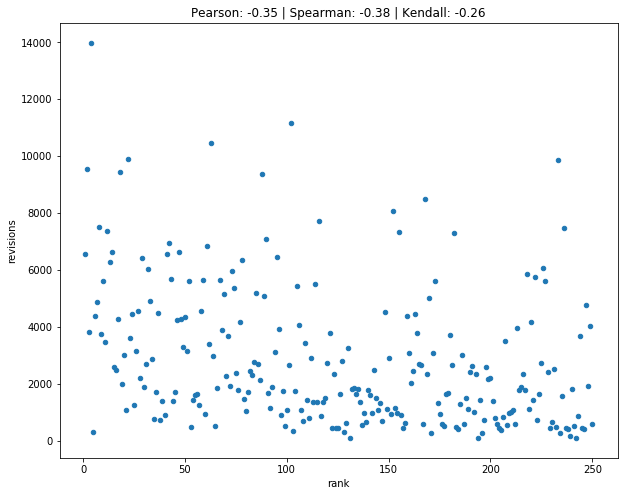

In [10]:
pearson_values = data.corr()['rank']['revisions']
spearman_values = data.corr('spearman')['rank']['revisions']
kendall_values = data.corr('kendall')['rank']['revisions']
_ = data.plot.scatter(
    "rank",
    "revisions", 
    title=f"Pearson: {pearson_values:.2} | Spearman: {spearman_values:.2} | Kendall: {kendall_values:.2}",
    figsize=(10, 8))

### 6. Conclusion
Overall, the comparision of how a movie is ranked in the IMDB top 250 and the number of revisions for it's wikipedia page are weakly negative correlated. This means that there is possibly a small relationship between a movies rank towards the top and the number of revisions, but not entirely so. Ideally, one would obtain more data, possibly the top 1000 movies in IMDB, to see if the relationship changes.